In [1]:
import numpy as np
import cv2

import json
import os

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import utils as ut

In [11]:
MASK = 'data/mask.png'
IMAGE_FOLDER = 'data/train/train-1-0/'

mask = cv2.imread(MASK,0)
homographies = json.loads(open(IMAGE_FOLDER+'homographies.json','r').read())

#images = []

orig_images = []
warped_images = []

for root, dirs, files in os.walk(IMAGE_FOLDER):
    for file in files:
        if file.endswith('.png'):
            img = cv2.imread(os.path.join(root,file))
            w,h,_ = img.shape
            res = cv2.bitwise_and(img,img,mask=mask) #apply the mask to remove the timestamp
            orig_images.append(res) #save the original

            w,h,_ = img.shape
            name = file.replace('.png','')
            M = np.array(homographies[name]) #get homography

            res = cv2.warpPerspective(res, M, (w,h)) #warp the image using the given homography
            warped_images.append(res)

In [60]:
def display_images(images, figsize=None, resize_dim=(200, 200)):
    if figsize: row, col = figsize
    else: row, col = 1,1
        
    fig, axs = plt.subplots(row, col, figsize=figsize)
    if row>1 or col>1: axs = axs.flatten()
    else: axs = [axs]
    fig.set_figwidth(20)
    fig.set_figheight(15)
    
    for img, ax in zip(images, axs):
        ax.imshow(cv2.resize(img, resize_dim), interpolation='nearest')
        
    plt.show()

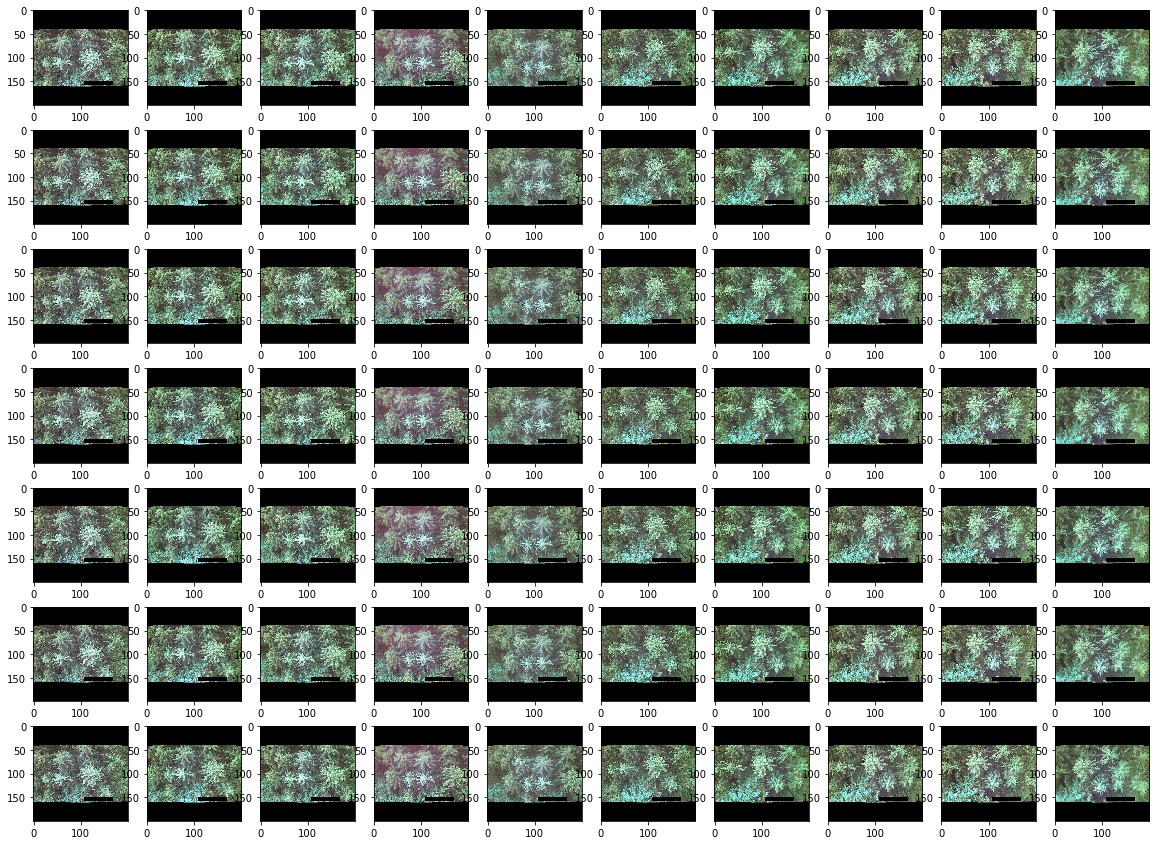

In [61]:
display_images(np.array(orig_images), figsize=(7,10), resize_dim=(200,200))
#display_images(np.array(warped_images), figsize=(7,10), resize_dim=(200,200))

In [78]:
def integrate(images: np.ndarray):
    print(type(images[0]))

    integrated_images = []
    """
    This is going through all the sets of images,True
    where images[0] represents 10 images in a numpy array
    """
    for i in range(len(images)): 
        integral = np.zeros((images[0].shape[1:]), np.float64)
        for j in range(len(images[i])):
            integral += images[i][j]
        integral /= len(images[i])
        integrated_images.append(integral)
    
    
    
    #integral = cv2.normalize(integral, None, 
    #    0, 255, cv2.NORM_MINMAX).astype(np.uint8)
    return integrated_images

integrated_images = integrate(np.array_split(warped_images,10))
print(type(integrated_images))
#display_images(integrated_images, figsize=(3,4), resize_dim=(400,400))

<class 'numpy.ndarray'>
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)


In [66]:
integrated_images = integrate(np.array_split(warped_images,10))

display_images(integrated_images, fig=(3,3), resize_dim=(400,400))

<class 'list'>


AttributeError: 'list' object has no attribute 'shape'